<a href="https://colab.research.google.com/github/brunokobi/Reconhecimento_Padrao/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

X, y = boston.data, boston.target
X12 = X[:, 12:13]





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [19]:
class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)

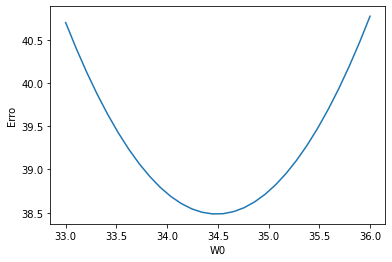

In [20]:
w0 = np.linspace(33, 36, 30)
w1 = np.linspace(-1, -0.8, 30)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)
plt.ylabel("Erro")
plt.xlabel("W0")
i=8
plt.plot(W0[i,:],Erro[i,:])
plt.show()
